In [67]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
insurance = pd.read_csv("insurance.csv")

In [69]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [70]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct= make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

In [71]:

x= insurance.drop("charges",axis=1)
y = insurance["charges"]
x_train, x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [72]:
ct.fit(x_train)
x_train_normal= ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [74]:
tf.random.set_seed(42)

insurance_model2= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)
history=insurance_model2.fit(x_train_normal, y_train, epochs=200, verbose=0)


In [75]:
insurance_model2.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3169.9246 - mae: 3169.9246


[3169.924560546875, 3169.924560546875]

Text(0.5, 0, 'epochs')

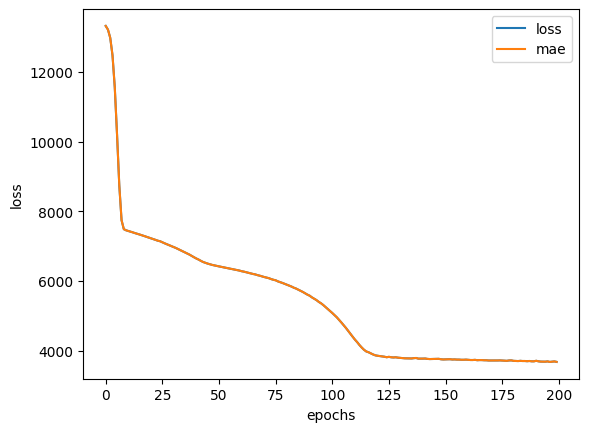

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")